In [2]:
import numpy as np
import pandas as pd
import datetime
import time
import regex as re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/reddit_df.csv')

In [4]:
df.head(2)

,text,unethical
0,"if an online video has no controls to skip, p...",0
1,i always judge people's maturity based on the...,0


In [5]:
scores = []

In [6]:
X = df['text']
y = df['unethical']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [104]:
tvec = TfidfVectorizer()
tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])
params = {
    'tvec__max_features': [None], 
    'tvec__stop_words': [['un', 'they', 'll', 'and', 'so', 'if', 'or', 'are', 'is']], 
    'tvec__ngram_range': [(1, 1)], 
    'tvec__min_df': [4], 
    'tvec__max_df': [.80], 
    'tvec__tokenizer': [None], 
}
grid = GridSearchCV(tvec_pipe,
                   params, n_jobs=6, 
                   cv=5)

In [105]:
%%time
grid.fit(X_train, y_train)

Wall time: 8.8 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [106]:
grid.best_score_

0.8114715618036918

In [107]:
grid.score(X_train, y_train)

0.8785009067096514

In [108]:
grid.score(X_test, y_test)

0.8200685069514406

In [109]:
scores.append(grid.best_params_)

In [110]:
scores.append(grid.best_score_)

In [111]:
scores

[{'tvec__max_df': 0.8,
  'tvec__max_features': None,
  'tvec__min_df': 4,
  'tvec__ngram_range': (1, 1),
  'tvec__stop_words': ['un', 'they', 'll', 'and'],
  'tvec__tokenizer': None},
 0.8170460208362613,
 {'tvec__max_df': 0.8,
  'tvec__max_features': None,
  'tvec__min_df': 4,
  'tvec__ngram_range': (1, 2),
  'tvec__stop_words': ['un', 'they', 'll', 'and'],
  'tvec__tokenizer': None},
 0.8266506164453558,
 {'tvec__max_df': 0.8,
  'tvec__max_features': None,
  'tvec__min_df': 4,
  'tvec__ngram_range': (1, 1),
  'tvec__stop_words': ['un', 'they', 'll', 'and', 'so'],
  'tvec__tokenizer': None},
 0.8145609511741349,
 {'tvec__max_df': 0.8,
  'tvec__max_features': None,
  'tvec__min_df': 4,
  'tvec__ngram_range': (1, 2),
  'tvec__stop_words': ['un', 'they', 'll', 'and', 'so'],
  'tvec__tokenizer': None},
 0.8251059104804621,
 {'tvec__max_df': 0.8,
  'tvec__max_features': None,
  'tvec__min_df': 4,
  'tvec__ngram_range': (1, 2),
  'tvec__stop_words': ['un',
   'they',
   'll',
   'and',
   '

In [112]:
coefficients = grid.best_estimator_.named_steps['lr'].coef_[0]

features = grid.best_estimator_.named_steps['tvec'].get_feature_names()

print(f'There are {len(coefficients)} coefficients.')
print(f'There are {len(features)} features.')

There are 9353 coefficients.
There are 9353 features.


In [113]:
coef_df = pd.DataFrame({'features': features, 
              'coef' : coefficients,
              'exp_coef': [np.exp(coef) for coef in coefficients] #exponentiated coefficients
             })

In [114]:
coef_df = coef_df.set_index('features')
coef_df = coef_df.sort_values('exp_coef', ascending = False)
coef_df.head(10)

,coef,exp_coef
features,,
free,5.090138,162.412346
fake,4.898697,134.114938
request,4.496020,89.659607
want,4.197685,66.532141
tell,4.107671,60.804916
return,3.931759,50.996603
get,3.671912,39.327021
claim,3.486349,32.666476
say,3.357849,28.727344


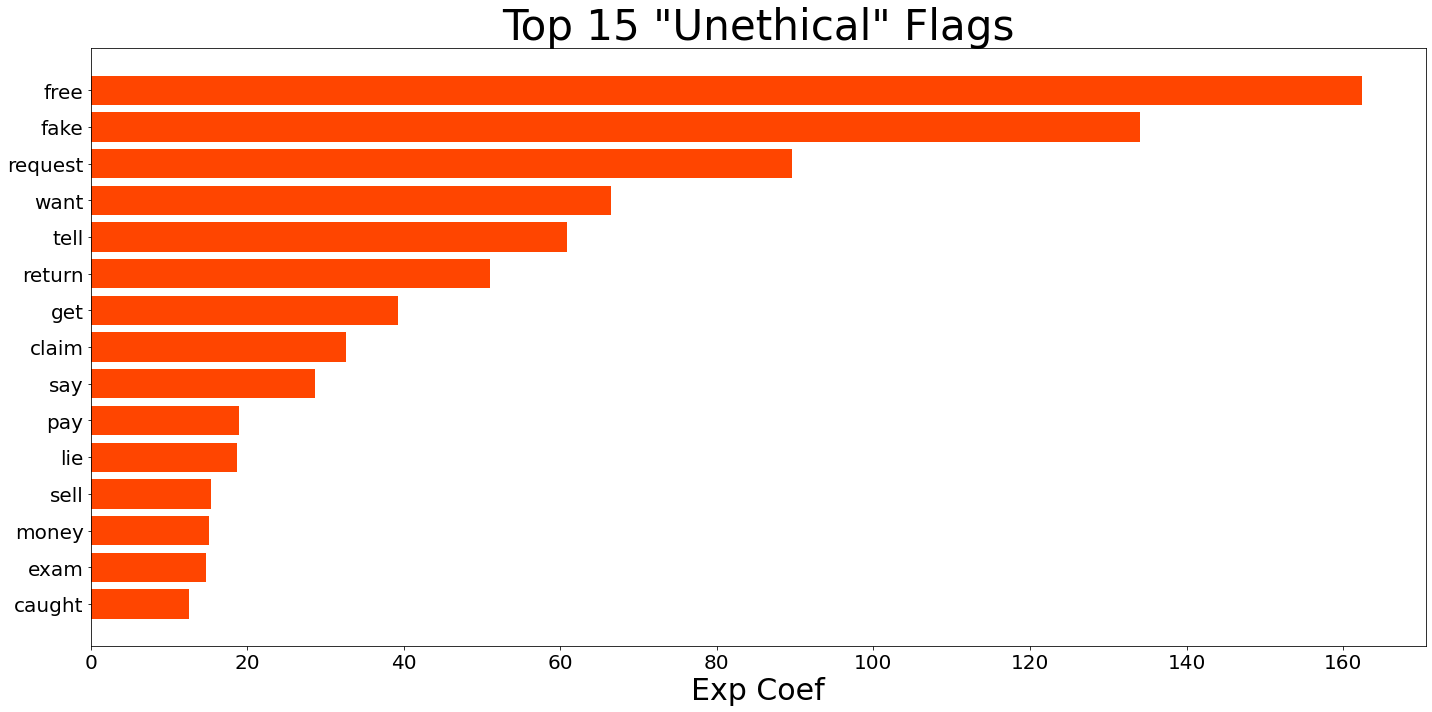

In [115]:
weights = coef_df['exp_coef'].head(15).sort_values()
labels = weights.index

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = '#ff4500')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Exp Coef', fontsize=30)
plt.title(f'Top 15 "Unethical" Flags', fontsize=42)
plt.tight_layout()

In [117]:
coef_df.head(10)

,coef,exp_coef
features,,
free,5.090138,162.412346
fake,4.898697,134.114938
request,4.496020,89.659607
want,4.197685,66.532141
tell,4.107671,60.804916
return,3.931759,50.996603
get,3.671912,39.327021
claim,3.486349,32.666476
say,3.357849,28.727344


We're going to try to feed in info from reddit.com/r/scams

In [ ]:
grid.predict()

In [118]:
df_scam = pd.read_csv('./data/scam_df.csv')

In [128]:
X_scam = tvec.fit(df_scam)

In [129]:
X_scam

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [131]:
df_scam

,text
0,got this weird message. guessing it's a scam?
1,when your friends post links to a free 2020 je...
2,i’ve been scammed 5k sorry for any grammatical...
3,i got scammed-will i be able to get refund? hi...
4,"my dad found this website with ""great guitars""..."
...,...
4843,always check the emails lol
4844,i think i just got scammed and feel so stupid
4845,is google opinion rewards a scam so i found th...
4846,"i'm going to jail (short) first time poster, b..."
